In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Titanic dataset 

In [2]:
df =pd.read_csv("/Users/mananmehta/Downloads/Train 4.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.4+ KB


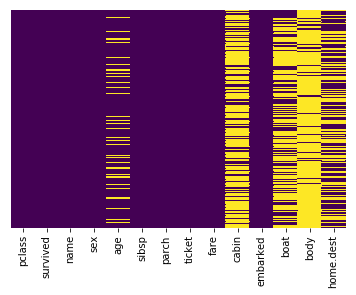

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

In [6]:
# dropping columns that have a lot of null values and are insignificant (name,ticket,parch,cabin,boat,body,home.dest)

In [7]:
df.drop(columns=['name','ticket','parch','cabin','boat','body','home.dest','embarked'],inplace=True)

In [8]:
# there are a lot of null values in age column so we will fill these null values by mean age

In [9]:
df.fillna(value={'age' : df['age'].mean() } ,inplace=True)

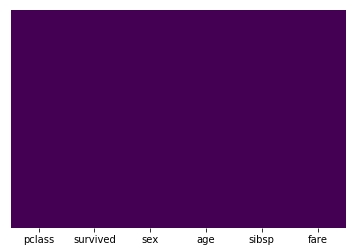

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null object
age         1009 non-null float64
sibsp       1009 non-null float64
fare        1008 non-null float64
dtypes: float64(5), object(1)
memory usage: 47.4+ KB


In [12]:
df.dropna(inplace=True) # To drop the row where fare is null

In [13]:
from sklearn.preprocessing import LabelEncoder 

In [14]:
le = LabelEncoder()     # changing sex column to categorical (numerical) data
df['sex'] = le.fit_transform(df['sex'])

In [15]:
df.head()

,pclass,survived,sex,age,sibsp,fare
0,3.0,0.0,0,29.838978,0.0,7.750
1,2.0,0.0,1,39.000000,0.0,26.000
2,2.0,1.0,0,40.000000,0.0,13.000
3,3.0,1.0,0,31.000000,1.0,20.525
4,3.0,1.0,0,29.838978,2.0,23.250


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1008
Data columns (total 6 columns):
pclass      1008 non-null float64
survived    1008 non-null float64
sex         1008 non-null int64
age         1008 non-null float64
sibsp       1008 non-null float64
fare        1008 non-null float64
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


In [20]:
def entropy(col): # function to calculate entropy
    counts = np.unique(col,return_counts=True)
    N = col.shape[0]
    
    ent = 0.0
    for ix in counts[1]:
        p = (ix/N)
        ent += -1*p*np.log2(p)
       
    return ent

In [17]:
def split_data(x,fkey,fval): # function to split dataset about column fkey and about the value fval
    x_right = pd.DataFrame([],columns = x.columns)
    x_left = pd.DataFrame([],columns = x.columns)
    
    for ix in range(x.shape[0]):
        val = x[fkey].iloc[ix]
        
        if val > fval:
            x_right = x_right.append(x.iloc[ix])
           
        else:
            x_left = x_left.append(x.iloc[ix])
           
       
    return x_right,x_left

In [18]:
def information_gain(x,fkey,fval):  # fkey - the column at which we have to calculate information gain
    x_right,x_left = split_data(x,fkey,fval) # splitting the data at a node
    info_gain = 0.0
    
    if x_right.shape[0]== 0 or x_left.shape[0] == 0:
        return -100000
    
    r = float(x_right.shape[0]/x.shape[0])
    l = float(x_left.shape[0]/x.shape[0])
   
    
    info_gain = entropy(x['survived']) - (r*entropy(x_right['survived'])  + l*entropy(x_left['survived'])  )
        
    return info_gain
    

    ## checking if information_gain() is working alright

In [21]:
l = []
for col in df.columns:
    print(col)
    print(information_gain(df,col,df[col].mean()))
    l.append(information_gain(df,col,df[col].mean()))
   
np.argmax(l)

pclass
0.055252408459321334
survived
0.9573100718238499
sex
0.19256420905234162
age
0.001016617736044667
sibsp
0.006426134610531209
fare
0.04232450650675745


1

In [22]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'fare'], dtype='object')

In [25]:
class DecisionTree:
    def __init__(self,depth = 0,max_depth = 5):
        self.fkey = None
        self.fval = None
        self.right = None
        self.left = None
        self.depth = depth
        self.max_depth = max_depth
        self.target  = None
       
    def train(self,x):
        cols = ['pclass','sex', 'age', 'sibsp', 'fare']
        info_gain = []
        for col in cols:
            info_gain.append(information_gain(x,col,x[col].mean()))
        
        self.fkey = cols[np.argmax(info_gain)]
        self.fval = x[self.fkey].mean()
        print(self.fkey)
        
        x_right,x_left = split_data(x,self.fkey,self.fval)
        
        x_right = x_right.reset_index(drop = True)
        x_left = x_left.reset_index(drop = True)
       
    # base case
        if x_right.shape[0] == 0 or x_left.shape[0] == 0:
            
            if np.mean(x.survived) > 0.5:
                self.target = 1
            
            else:
                self.target = 0
                
            return
        
        # base case
        if self.depth == self.max_depth:
             if np.mean(x.survived) > 0.5:
                self.target = 1
             else:
                self.target = 0
               
             return 
       # recursive case 
        self.left= DecisionTree(depth =self.depth+1,max_depth=self.max_depth)
        self.left.train(x_left)
        # recursive case
        self.right = DecisionTree(depth = self.depth + 1,max_depth=self.max_depth)
        self.right.train(x_right)
        
         # to set targets to each node
        if np.mean(x.survived) > 0.5:
            self.target = 1
           
        else:
            self.target = 0
        
        return 
    
    def predict(self,test):
        if test[self.fkey] > self.fval:
            
            if self.right is None:
                return self.target
            else:
                return self.right.predict(test)
           
        else:
            if self.left is None:
                return self.target
            else:
                return self.left.predict(test)

# Train _Test split

In [26]:
split = int(0.7*df.shape[0])
X_train = df.iloc[:split]
X_test = df.iloc[split:]
X_test = X_test.reset_index(drop = True)

In [27]:
dt = DecisionTree()

In [28]:
dt.train(X_train)

sex
pclass
fare
fare
age
age
age
sibsp
age
pclass
fare
age
age
age
sibsp
age
age
sibsp
fare
fare
fare
age
age
age
fare
fare
age
age
fare
fare
age
age
fare
age
age
age
pclass
pclass
fare
fare
age
pclass
sibsp
pclass
age
age
age
age
fare
age
sibsp
pclass
age
pclass
sibsp
pclass
pclass
fare
age
fare
pclass
age
age


In [29]:
pred = []
for ix in range(X_test.shape[0]):
    p = dt.predict(X_test.iloc[ix])
    pred.append(p)

In [30]:
accuracy = np.mean(pred == X_test.survived)
print(accuracy)

0.7722772277227723


## We got a 77% accuracy